<a href="https://colab.research.google.com/github/victorjusa/Quantum_algorithms/blob/main/Uso_librerias_Quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Qiskit

##Librerias e imports

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator
import matplotlib.pyplot as plt

##Circuitos y resultados

In [6]:
#Creamos un circuito con dos Qubits
qc= QuantumCircuit(2)
#Aplicamos la puerta Hadaman sobre el primero
qc.h(0)
#Aplicamos la puerta CNOT estableciendo el primero qubit como control y el segundo como objetivo
qc.cx(0,1)

#Creamos así un circuito que esta entrelazado
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

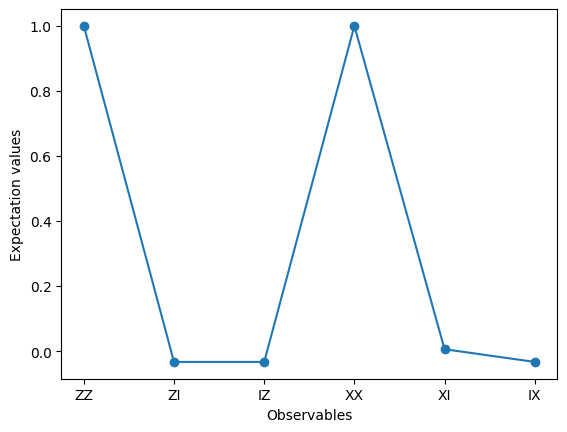

In [7]:
#Creamos los operadores de Pauli
zz=Pauli('ZZ')
zi=Pauli('ZI')
iz=Pauli('IZ')
xx=Pauli('XX')
xi=Pauli('XI')
ix=Pauli('IX')

observables = [zz,zi,iz,xx,xi,iz]

estimator =Estimator()

job=estimator.run([qc]*len(observables),observables)

data=['ZZ','ZI','IZ','XX','XI','IX']

values=job.result().values
plt.plot(data,values,'-o')
plt.xlabel('Observables')
plt.ylabel('Expectation values')
plt.show()


#Cirq

##Librerias e imports

In [ ]:
!pip install cirq

In [9]:
import cirq
import numpy as np
import matplotlib.pyplot as plt


##Circuito y resultados

In [10]:
# Creamos un circuito con dos Qubits
qubit0 = cirq.LineQubit(0)
qubit1 = cirq.LineQubit(1)
circuit = cirq.Circuit()

# Aplicamos la puerta Hadamard sobre el primero
circuit.append(cirq.H(qubit0))

# Aplicamos la puerta CNOT estableciendo el primer qubit como control y el segundo como objetivo
circuit.append(cirq.CNOT(qubit0, qubit1))

# Creamos así un circuito que está entrelazado
print(circuit)

0: ───H───@───
          │
1: ───────X───


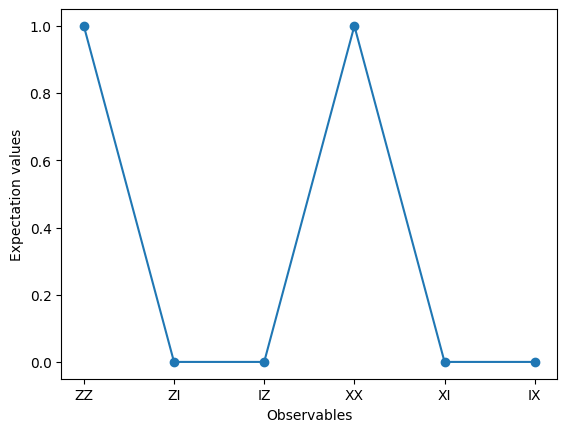

In [11]:
# Definimos los operadores de Pauli
pauli_zz = cirq.Z(qubit0) * cirq.Z(qubit1)
pauli_zi = cirq.Z(qubit0)
pauli_iz = cirq.Z(qubit1)
pauli_xx = cirq.X(qubit0) * cirq.X(qubit1)
pauli_xi = cirq.X(qubit0)
pauli_ix = cirq.X(qubit1)

observables = [pauli_zz, pauli_zi, pauli_iz, pauli_xx, pauli_xi, pauli_ix]

# Simulamos el circuito
simulator = cirq.Simulator()

# Calculamos los valores esperados
results = []
for observable in observables:
    result = simulator.simulate_expectation_values(circuit, observables=[observable])
    results.append(result[0])

# Graficamos los resultados
data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = [result.real for result in results]

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation values')
plt.show()

#Pennylane

##Librerias e imports

In [ ]:
!pip install pennylane

In [13]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

##Circuitos y resultados

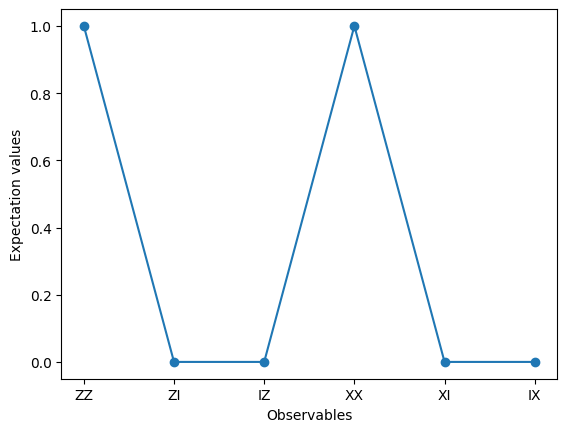

In [14]:
# Definimos el dispositivo
dev = qml.device('default.qubit', wires=2)

# Definimos el circuito cuántico
@qml.qnode(dev)
def entangled_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return [qml.expval(qml.PauliZ(0) @ qml.PauliZ(1)),
            qml.expval(qml.PauliZ(0)),
            qml.expval(qml.PauliZ(1)),
            qml.expval(qml.PauliX(0) @ qml.PauliX(1)),
            qml.expval(qml.PauliX(0)),
            qml.expval(qml.PauliX(1))]

# Ejecutamos el circuito
results = entangled_circuit()

# Nombramos los observables
data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = [result for result in results]

# Graficamos los resultados
plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation values')
plt.show()
